# Individual Planning Report

## Introduction

To answer the question "What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?", I have decided to analyze the "players_data" dataset and look at how subsciption status is affected by different factors including gender, age, and experience. A research group in Computer Science at UBC, led by Frank Wood, collected the dataset analyzed in this report. The game that this dataset is about is Minecraft.

In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
players_data <- read_csv("players_data.csv")

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


## Data Description and Exploratory Data Analysis and Visualization

In [3]:
players_data_statistics <- players_data |>
    summary()
players_data_statistics

  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                               

There are 7 different variables in this dataset, with "subscribe" being the response variable. The goal of the dataset is to use all other variables, other than "name" and "hashedEmail", to predict the value of "subscribe". The explanatory variables would include "experience", "played_hours", "gender", and "age".

The "hashedEmail" variable describes the email of each player in hash; hash is not decodable, and this variable is not correlated to the research question.

The "name" variable describes the name of each player, and this variable is not correlated to the research question.

The "subscribe" variable describes whether each player is subscribed to a game-related newsletter.

The "experience" variable describes the experience level of players ranging from "Beginner" to "Veteran" with beginners being new to the game and veterans being the most experienced to the game.

The "played_hours" variable describes the total played hours of each player.

The "gender" variable describes the gender of each player.

The "age" variable describes the age of each player.

Note: played_hours is very skewed to the right as the mean is much greater than the median, age is slightly skewed to the right

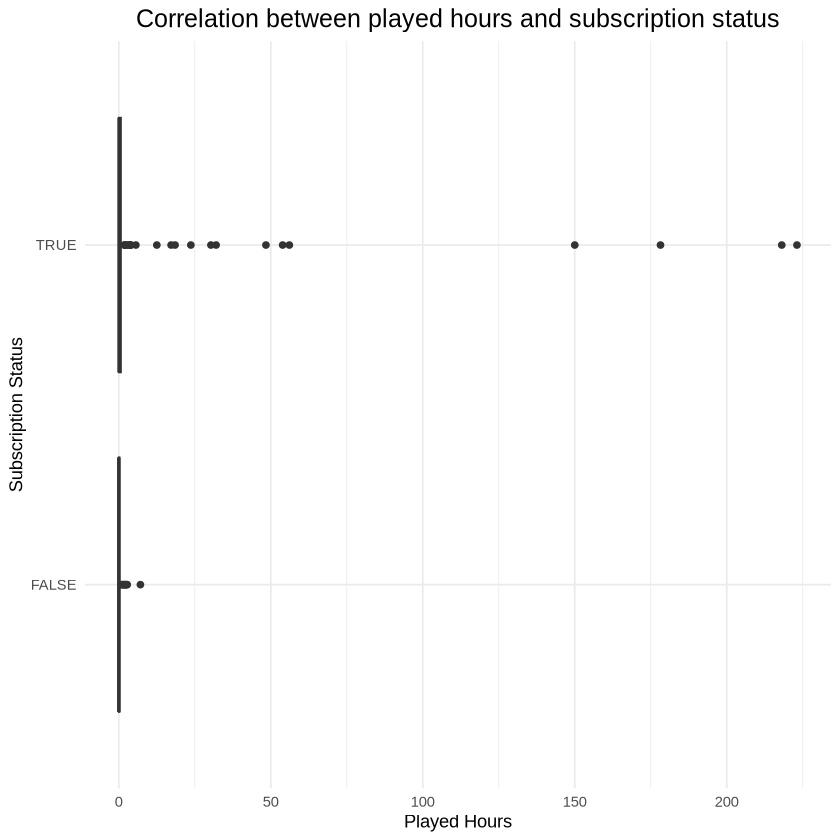

In [5]:
box_plot <- players_data |>
    ggplot(aes(x = played_hours, y = subscribe)) +
    geom_boxplot() +
    labs(title = "Correlation between played hours and subscription status",
    x = "Played Hours",
    y = "Subscription Status") +
    theme_minimal() +
    theme(plot.title = element_text(size = 15, hjust = 0.5))

box_plot

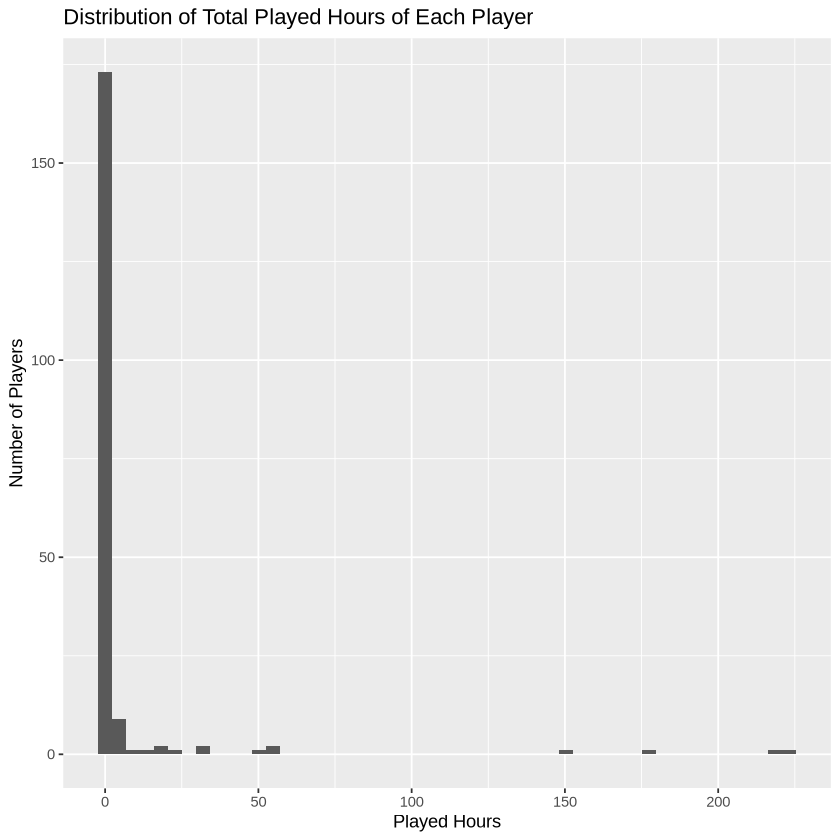

In [6]:
hist_plot <- players_data |>
    ggplot(aes(x = played_hours)) +
    geom_histogram(bins = 50) +
    labs( title = "Distribution of Total Played Hours of Each Player",
    x = "Played Hours", y = "Number of Players")

hist_plot

At a glance, total hours played seems too skewed to be a good predictor for subscription status.

## Questions

Broad Question: What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

Individual Question 1: Can the age of a player predict whether or not they will subscribe to a game-related newsletter?

Individual Question 2: Can the gender of a player predict whether or not they will subscribe to a game-related newsletter?

Individual Question 3: Can the experience level of a player predict whether or not they will subscribe to a game-related newsletter?

## Methods and Plan

I will use a classification model to answer questions 1 to 3. A classification model uses specified predictors to categorize new data for the response variable. Using a confusion matrix after building the classification model, I can check how accurate the model is by comparing how many times the model is wrong for each variable to how often it is correct; this will determine whether or not each variable is a good predictor for subscription status of Minecraft players.

## GitHub Repository

https://github.com/Jessica9521/Individual-Planning-Report/blob/main/Individual%20Planning%20Report.ipynb